# Image Denoising

Contents:
- Median Filter
- Gaussian Filter

Author: Abijith J. Kamath
https://kamath-abhijith.github.io

In [7]:
import numpy as np
import cv2

from skimage import io
from scipy import signal
from matplotlib import pyplot as plt
from matplotlib import rcParams
from matplotlib import style

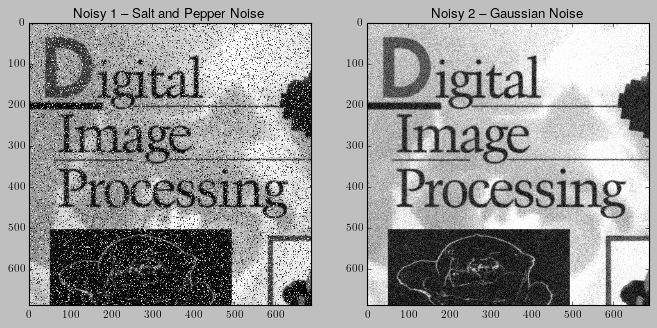

In [8]:
## READ AND DISPLAY IMAGES

noisy1 = io.imread('noisy-book1.png', 0)
noisy2 = io.imread('noisy-book2.png', 0)

style.use('classic')
rcParams['text.usetex'] = True
rcParams.update({'font.size': 10})
rcParams['text.latex.preamble'] = [r'\usepackage{tgheros}'] 

fig, plts = plt.subplots(1,2,figsize=(10,6))
plts[0].imshow(noisy1, vmin=0, vmax=255, cmap='gray')
plts[0].set_title(r"Noisy 1 -- Salt and Pepper Noise")

plts[1].imshow(noisy2, vmin=0, vmax=255, cmap='gray')c
plts[1].set_title(r"Noisy 2 -- Gaussian Noise")

plt.savefig('/Users/abhijith/Desktop/TECHNOLOGIE/Courses/E9 241 Digital Signal Processing/Assignments/Assignment_4/Answers/figures/noise_originals.eps', format='eps')
plt.show()

## Median and Gaussian Filtering

In [9]:
## FUNCTION DEFINITON :: MEDIAN AND GAUSSIAN FILTERING

def gaussian_filter(image, kernel_size, var):
    m = kernel_size[0]
    n = kernel_size[1]
    gaussian_matrix = np.zeros((m,n))
    for i in range(m):
        for j in range(n):
            d = (i-m/2)**2 + (j-n/2)**2
            gaussian_matrix[i,j] = np.exp(-d/(2*var**2))

    return signal.convolve2d(image, gaussian_matrix, mode='same', boundary='fill', fillvalue=0)

def median_filter(image):
    m,n = image.shape
    
    out_image = np.zeros(image.shape)
    window = np.zeros(9)
    for i in range(image.shape[0]-1):
        for j in range(image.shape[1]-1):
            window[0] = image[i-1,j-1]
            window[1] = image[i-1,j]
            window[2] = image[i-1,j+1]
            window[3] = image[i,j-1]
            window[4] = image[i,j]
            window[5] = image[i,j+1]
            window[6] = image[i+1,j-1]
            window[7] = image[i+1,j]
            window[8] = image[i+1,j+1]

            window.sort()
            out_image[i,j] = window[4]

    return out_image

In [10]:
## MAIN :: MEDIAN AND GAUISSIAN FILTERING

noisy1_median = median_filter(noisy1)

kernel_size = (3,3)
var = 1000
noisy1_gaussian = gaussian_filter(noisy1, kernel_size, var)

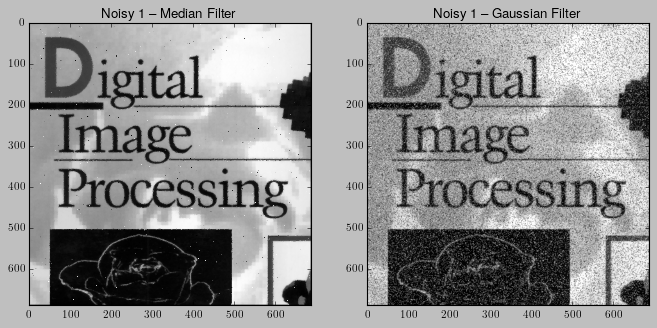

In [11]:
## PLOTS :: MEDIAN AND GAUSSIAN FILTERING

fig, plts = plt.subplots(1,2,figsize=(10,6))
plts[0].imshow(noisy1_median, cmap='gray')
plts[0].set_title(r"Noisy 1 -- Median Filter")

plts[1].imshow(noisy1_gaussian, cmap='gray')
plts[1].set_title(r"Noisy 1 -- Gaussian Filter")

plt.savefig('/Users/abhijith/Desktop/TECHNOLOGIE/Courses/E9 241 Digital Signal Processing/Assignments/Assignment_4/Answers/figures/medianfilter.eps', format='eps')
plt.show()

## Bilateral and Non-Local Means

In [12]:
## FUNCTION DEFINITION :: BILATERAL AND NON-LOCAL MEANS

def distance(x,y, i,j):
    return np.sqrt((x-i)**2 + (y-j)**2)

def gaussian(x, sigma):
    return np.exp(-x**2/(2.0*sigma**2))/(np.sqrt(2.0*np.pi*sigma**2))

def bilateral_filter(image, diameter, sigma_i, sigma_s):
    new_image = np.zeros(image.shape)

    for row in range(len(image)):
        for col in range(len(image[0])):
            wp_total = 0
            filtered_image = 0
            for k in range(diameter):
                for l in range(diameter):
                    n_x =row - (diameter/2 - k)
                    n_y =col - (diameter/2 - l)
                    if n_x >= len(image):
                        n_x -= len(image)
                    if n_y >= len(image[0]):
                        n_y -= len(image[0])
                    gi = gaussian(image[int(n_x)][int(n_y)] - image[row][col], sigma_i)
                    gs = gaussian(distance(n_x, n_y, row, col), sigma_s)
                    wp = gi * gs
                    filtered_image = (filtered_image) + (image[int(n_x)][int(n_y)] * wp)
                    wp_total = wp_total + wp
            filtered_image = filtered_image // wp_total
            new_image[row][col] = int(np.round(filtered_image))
    return new_image

In [13]:
## MAIN :: BILATERAL FILTER AND NONLOCAL MEANS

sigma_i = 10.0
sigma_s = 10.0
radius = 5
noisy2_bilateral = bilateral_filter(noisy2, radius, sigma_i, sigma_s)

kernal_size = (5,5)
var = 10
noisy2_gaussian = gaussian_filter(noisy2, kernel_size, var)

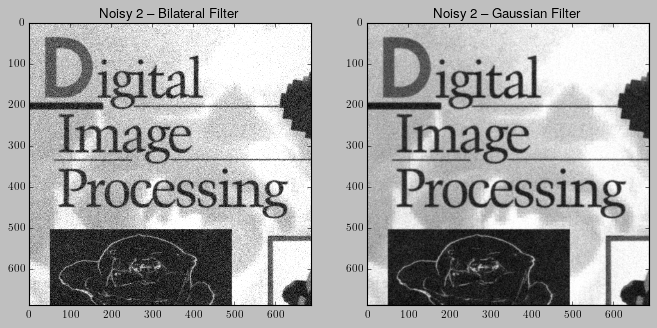

In [14]:
## PLOT :: BILATERAL AND NONLOCAL MEANS

fig, plts = plt.subplots(1,2,figsize=(10,6))
plts[0].imshow(noisy2_bilateral, cmap='gray')
plts[0].set_title(r"Noisy 2 -- Bilateral Filter")

plts[1].imshow(noisy2_gaussian, cmap='gray')
plts[1].set_title(r"Noisy 2 -- Gaussian Filter")

plt.savefig('/Users/abhijith/Desktop/TECHNOLOGIE/Courses/E9 241 Digital Signal Processing/Assignments/Assignment_4/Answers/figures/bilateral.eps', format='eps')
plt.show()

## Decimation and Filtering

In [15]:
## FUNCTION DEFINITION :: DECIMATION

def decimate_image(image, decimation_factor):
    m,n = image.shape
    return image[0:m:decimation_factor, 0:n:decimation_factor]

In [25]:
## MAIN :: DECIMATION

image = io.imread('barbara.tif', 0)

decimation_factor = 2
decimated_image = decimate_image(image, decimation_factor)

var = 2
kernel_size = (3,3)
decimated_image_postp = decimate_image(gaussian_filter(image, kernel_size, var), decimation_factor)

resized_image = cv2.resize(image, dsize=(int(image.shape[1]/decimation_factor), int(image.shape[0]/decimation_factor)), interpolation=cv2.INTER_CUBIC)

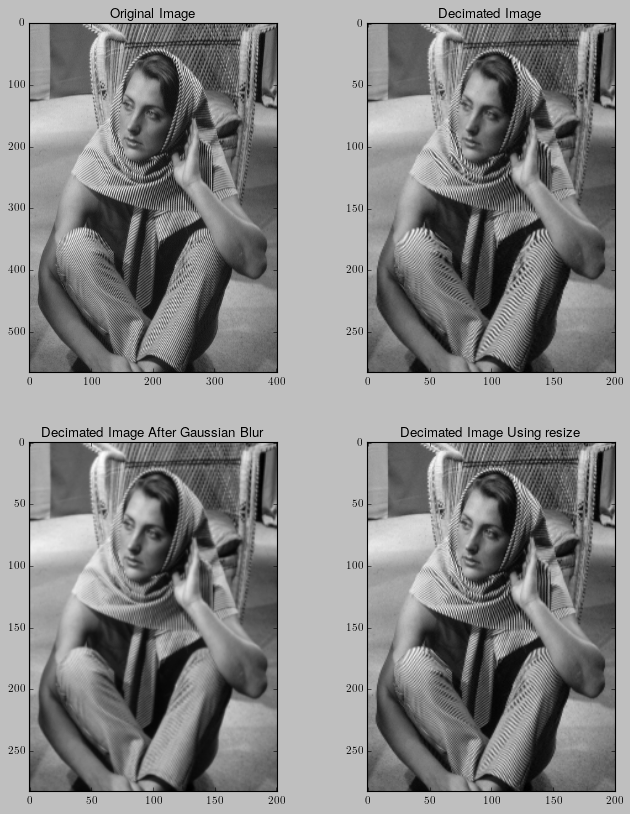

In [26]:
## PLOTS :: DECIMATION

fig, plts = plt.subplots(2,2,figsize=(10,12))
plts[0][0].imshow(image, cmap='gray')
# plts[0][0].set_xlim([0,image.shape[1]])
# plts[0][0].set_ylim([image.shape[0],0])
plts[0][0].set_title(r"Original Image")

plts[0][1].imshow(decimated_image, cmap='gray')
# plts[0][1].set_xlim([0,image.shape[1]])
# plts[0][1].set_ylim([image.shape[0],0])
plts[0][1].set_title(r"Decimated Image")

plts[1][0].imshow(decimated_image_postp, cmap='gray')
# plts[1][0].set_xlim([0,image.shape[1]])
# plts[1][0].set_ylim([image.shape[0],0])
plts[1][0].set_title(r"Decimated Image After Gaussian Blur")

plts[1][1].imshow(resized_image, cmap='gray')
# plts[1][1].set_xlim([0,image.shape[1]])
# plts[1][1].set_ylim([image.shape[0],0])
plts[1][1].set_title(r"Decimated Image Using resize")

plt.savefig('/Users/abhijith/Desktop/TECHNOLOGIE/Courses/E9 241 Digital Signal Processing/Assignments/Assignment_4/Answers/figures/decimation.eps', format='eps')
plt.show()